In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Put the path to your copy of celebA
full_df = pd.read_csv('celebA/list_attr_celeba.csv')

In [3]:
# Determine some percentages
male_df = full_df.loc[full_df['Male']==1]
female_df = full_df.loc[full_df['Male'] == -1]
pale_df = full_df.loc[full_df['Pale_Skin'] == 1]
dark_df = full_df.loc[full_df['Pale_Skin'] == -1]

attractive_df = full_df.loc[full_df['Attractive'] == 1]
unattractive_df = full_df.loc[full_df['Attractive'] == -1]

In [4]:
male_attract = male_df.loc[male_df['Attractive'] == 1]
female_attract = female_df.loc[female_df['Attractive'] == 1]

print(f'% of males that are attractive: {len(male_attract)/len(male_df)}')
print(f'% of females that are attractive: {len(female_attract)/len(female_df)}')

% of males that are attractive: 0.27925953999573633
% of females that are attractive: 0.6791689586595016


In [5]:
pale_attract = pale_df.loc[pale_df['Attractive'] == 1]
dark_attract = dark_df.loc[dark_df['Attractive'] == 1]

print(f'% of pale that are attractive: {len(pale_attract)/len(pale_df)}')
print(f'% of dark that are attractive: {len(dark_attract)/len(dark_df)}')

% of pale that are attractive: 0.7155499367888748
% of dark that are attractive: 0.5033935368080125


In [6]:
# Supposedly there is not a drastic picture quality difference between pale and dark people
blurry_pale = pale_df.loc[pale_df['Blurry'] == 1]
blurry_dark = dark_df.loc[dark_df['Blurry'] == 1]

print(f'% of pale that are blurry: {len(blurry_pale)/len(pale_df)}')
print(f'% of dark that are blurry: {len(blurry_dark)/len(dark_df)}')

% of pale that are blurry: 0.029881622801976784
% of dark that are blurry: 0.05184168996070099


In [7]:
old = full_df.loc[full_df['Young'] == -1]
old_attractive = old[old['Attractive'] == 1]

print(f'% of old that are attractive: {len(old_attractive)/len(old)}')
old_female = female_df[female_df['Young'] == -1]
old_male = male_df[male_df['Young'] == -1]

print(f'% males that are old: {len(old_male)/len(male_df)}')
print(f'% females that are old: {len(old_female)/len(female_df)}')

% of old that are attractive: 0.15423525564155674
% males that are old: 0.366996707487505
% females that are old: 0.12590868700545846


In [8]:
full_df_no_id = full_df.drop('image_id',1)

<ipython-input-8-6e795b39d891>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_df_no_id = full_df.drop('image_id',1)


<AxesSubplot:>

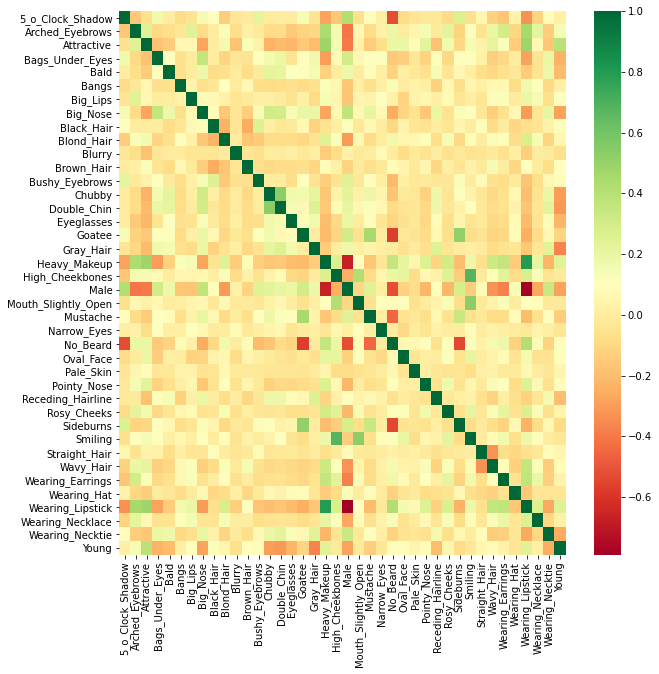

In [9]:
# Try some seaborn heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(full_df_no_id.corr(), cmap="RdYlGn", ax=ax)

In [10]:
young = full_df.loc[full_df['Young'] == 1]
young_female = female_df[female_df['Young'] == 1]
young_male = male_df[male_df['Young'] == -1]

print(f'% males that are young: {len(young_male)/len(male_df)}')
print(f'% females that are young: {len(young_female)/len(female_df)}')

% males that are young: 0.366996707487505
% females that are young: 0.8740913129945416


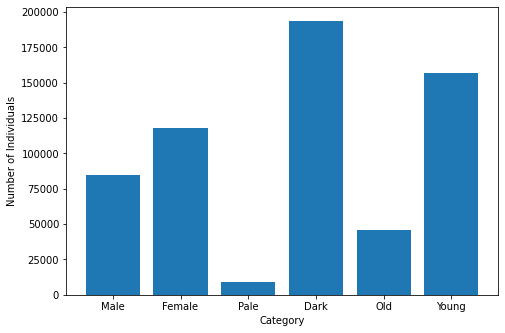

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cats = ['Male', 'Female', 'Pale', 'Dark', 'Old', 'Young']

lengths = [len(male_df), len(female_df), len(pale_df), len(dark_df), len(old), len(young)]
plt.xlabel('Category')
plt.ylabel('Number of Individuals')
ax.bar(cats,lengths)
plt.show()

In [12]:
# Analyzing the test data on the unbalanced vs balanced

In [13]:
test_df = pd.read_pickle('test.pickle')

In [14]:
test_file_names = list(test_df.drop('labels',1).index)

<ipython-input-14-f4af3550ec2d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_file_names = list(test_df.drop('labels',1).index)


In [15]:
use_balanced = True
predictions_file = 'predictions_test_balance.csv' if use_balanced else 'predictions_test3.csv'

In [16]:
predictions_test_df = pd.read_csv(predictions_file, header=None)

In [17]:
preds_with_filename_dict = {'image_id':test_file_names, 'prediction':list(predictions_test_df.values)}

In [18]:
preds_with_filename_df = pd.DataFrame.from_dict(preds_with_filename_dict)

In [19]:
preds_with_filename_df

,image_id,prediction
0,182638.jpg,[0]
1,182639.jpg,[0]
2,182640.jpg,[0]
3,182641.jpg,[0]
4,182642.jpg,[0]
...,...,...
19957,202595.jpg,[0]
19958,202596.jpg,[1]
19959,202597.jpg,[1]
19960,202598.jpg,[0]


In [20]:
joined_df = pd.merge(full_df, preds_with_filename_df, on='image_id', how='inner')

In [21]:
joined_df.prediction[joined_df.prediction == 0] = -1

<ipython-input-21-5439fe27fa12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df.prediction[joined_df.prediction == 0] = -1


In [22]:
joined_df['success'] = np.where(joined_df['Male'] == joined_df['prediction'], 1, 0)

In [23]:
joined_df.loc[joined_df.prediction == joined_df.Male, 'success'].sum()/len(predictions_test_df)

0.9669371806432221

In [24]:
joined_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,prediction,success
0,182638.jpg,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,-1,-1,1
1,182639.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,1,-1,-1,1,-1,-1,1,-1,1
2,182640.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,1,-1,1
3,182641.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,1,-1,1
4,182642.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,-1,1
19958,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,1,[1],1
19959,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,[1],1
19960,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,1,-1,1,-1,-1,1,-1,1


In [25]:
joined_df[['image_id','Male','prediction']]

,image_id,Male,prediction
0,182638.jpg,-1,-1
1,182639.jpg,-1,-1
2,182640.jpg,-1,-1
3,182641.jpg,-1,-1
4,182642.jpg,-1,-1
...,...,...,...
19957,202595.jpg,-1,-1
19958,202596.jpg,1,[1]
19959,202597.jpg,1,[1]
19960,202598.jpg,-1,-1


In [26]:
female_test = joined_df.loc[joined_df['Male'] == -1]

In [27]:
female_acc = female_test.loc[female_test.prediction == female_test.Male, 'success'].sum()/len(female_test)
print(f'Accuracy for females:{female_acc}')

Accuracy for females:0.9654609292071528


In [28]:
male_test = joined_df.loc[joined_df['Male'] == 1]

In [29]:
male_acc = male_test.loc[male_test.prediction == male_test.Male, 'success'].sum()/len(male_test)
print(f'Accuracy for males:{male_acc}')

Accuracy for males:0.9692806221646144


In [30]:
# Comparing the lengths
print(f'% of female in the test set: {len(female_test)/len(joined_df)}')
print(f'% of male in the test set: {len(male_test)/len(joined_df)}')

% of female in the test set: 0.613515679791604
% of male in the test set: 0.38648432020839596


In [31]:
# Training set had similar distribution to test set

female_pct = len(female_test)/len(joined_df)
male_pct = 1 - female_pct
print(f'% of females in training: {female_pct}')
print(f'% of males in training: {male_pct}')

% of females in training: 0.613515679791604
% of males in training: 0.38648432020839596


In [32]:
pale_test = joined_df.loc[joined_df['Pale_Skin'] == 1]
pale_acc = pale_test.loc[pale_test.prediction == pale_test.Male, 'success'].sum()/len(pale_test)
print(f'Accuracy for pale skin:{pale_acc}')

Accuracy for pale skin:0.9488095238095238


In [33]:
dark_test = joined_df.loc[joined_df['Pale_Skin'] == -1]
dark_acc = dark_test.loc[dark_test.prediction == dark_test.Male, 'success'].sum()/len(dark_test)
print(f'Accuracy for darker skin:{dark_acc}')

Accuracy for darker skin:0.9677335006798452


In [34]:
young_test = joined_df.loc[joined_df['Young'] == 1]
young_acc = young_test.loc[young_test.prediction == young_test.Male, 'success'].sum()/len(young_test)
print(f'Accuracy for young:{young_acc}')

Accuracy for young:0.9677782188699219


In [35]:
old_test = joined_df.loc[joined_df['Young'] == -1]
old_acc = old_test.loc[old_test.prediction == old_test.Male, 'success'].sum()/len(old_test)
print(f'Accuracy for old:{old_acc}')

Accuracy for old:0.9643151815181518


In [36]:
# Beginning analysis on some joined category

In [37]:
# Given that Female, Dark, and Young are the most prevalent categories,
#    we would expect their accuracy to be higher than Male, Dark, and Young

In [38]:
# Inner join Dark with Young, and inner join result with Female
fdy_test = pd.merge(pd.merge(dark_test, young_test, on='image_id', how='inner'), female_test, on='image_id', how='inner')
fdy_test_acc = fdy_test.loc[fdy_test.prediction == fdy_test.Male, 'success'].sum()/len(fdy_test)
print(f'Accuracy for Female, Dark, Young:{fdy_test_acc}')

Accuracy for Female, Dark, Young:0.9718830169317598


In [39]:
# Inner join Dark with Young, and inner join result with Male
mdy_test = pd.merge(pd.merge(dark_test, young_test, on='image_id', how='inner'), male_test, on='image_id', how='inner')
mdy_test_acc = mdy_test.loc[mdy_test.prediction == mdy_test.Male, 'success'].sum()/len(mdy_test)
print(f'Accuracy for Male, Dark, Young:{mdy_test_acc}')

Accuracy for Male, Dark, Young:0.9617697594501718


In [40]:
# And indeed this is the case
# Let's take a look at the sizes though
print(f'% mdy: {len(mdy_test)/(len(mdy_test)+len(fdy_test))}')
print(f'% fdy: {len(fdy_test)/(len(mdy_test)+len(fdy_test))}')

# There are two times as many young dark females as compared to young dark males

% mdy: 0.32331088118880635
% fdy: 0.6766891188111936


In [41]:
# Next, we will look at young females vs young males

yf_test = pd.merge(young_test, female_test, on='image_id', how='inner')
yf_test_acc = yf_test.loc[yf_test.prediction_y == yf_test.Male_y, 'success_y'].sum()/len(yf_test)
print(f'Accuracy for Young Female:{yf_test_acc}')

ym_test = pd.merge(young_test, male_test, on='image_id', how='inner')
ym_test_acc = ym_test.loc[ym_test.prediction_y == ym_test.Male_y, 'success_y'].sum()/len(ym_test)
print(f'Accuracy for Young Male:{ym_test_acc}')

Accuracy for Young Female:0.9709611847836608
Accuracy for Young Male:0.9609031988291867


In [42]:
# Let's take a look at the sizes again
print(f'% mdy: {len(ym_test)/(len(ym_test)+len(yf_test))}')
print(f'% fdy: {len(yf_test)/(len(ym_test)+len(yf_test))}')

# Once again, twice as many females than males

% mdy: 0.31646155881963745
% fdy: 0.6835384411803626


In [43]:
of_test = pd.merge(old_test, female_test, on='image_id', how='inner')
of_test_acc = of_test.loc[of_test.prediction_y == of_test.Male_y, 'success_y'].sum()/len(of_test)
print(f'Accuracy for Old Female:{of_test_acc}')

om_test = pd.merge(old_test, male_test, on='image_id', how='inner')
om_test_acc = om_test.loc[om_test.prediction_y == om_test.Male_y, 'success_y'].sum()/len(om_test)
print(f'Accuracy for Old Male:{om_test_acc}')

Accuracy for Old Female:0.93580375782881
Accuracy for Old Male:0.9829467939972715


In [44]:
# Curious that if you are "old" and male, the accuracy skyrockets, whereas for old and female, the accuracy plummets
# Let's take a look at their lengths

print(f'% om: {len(om_test)/(len(om_test)+len(of_test))}')
print(f'% of: {len(of_test)/(len(om_test)+len(of_test))}')

# The sizes are now skewed to male, but not by double

% om: 0.6047854785478548
% of: 0.3952145214521452


In [45]:
# Finally, we will compare the accuracies for pale/dark with male/female

In [46]:
pf_test = pd.merge(pale_test, female_test, on='image_id', how='inner')
pf_test_acc = pf_test.loc[pf_test.prediction_y == pf_test.Male_y, 'success_y'].sum()/len(pf_test)
print(f'Accuracy for Pale Female:{pf_test_acc}')

pm_test = pd.merge(pale_test, male_test, on='image_id', how='inner')
pm_test_acc = pm_test.loc[pm_test.prediction_y == pm_test.Male_y, 'success_y'].sum()/len(pm_test)
print(f'Accuracy for Pale Male:{pm_test_acc}')

Accuracy for Pale Female:0.9525222551928784
Accuracy for Pale Male:0.9337349397590361


In [47]:
print(f'% pm: {len(pm_test)/(len(pm_test)+len(pf_test))}')
print(f'% pf: {len(pf_test)/(len(pm_test)+len(pf_test))}')

# 4 times as many pale females as pale males

% pm: 0.1976190476190476
% pf: 0.8023809523809524


In [48]:
df_test = pd.merge(dark_test, female_test, on='image_id', how='inner')
df_test_acc = df_test.loc[df_test.prediction_y == df_test.Male_y, 'success_y'].sum()/len(df_test)
print(f'Accuracy for Dark Female:{df_test_acc}')

dm_test = pd.merge(dark_test, male_test, on='image_id', how='inner')
dm_test_acc = dm_test.loc[dm_test.prediction_y == dm_test.Male_y, 'success_y'].sum()/len(dm_test)
print(f'Accuracy for Dark Male:{dm_test_acc}')

Accuracy for Dark Female:0.9662144647023244
Accuracy for Dark Male:0.9700622599019738


In [49]:
print(f'% dm: {len(dm_test)/(len(dm_test)+len(df_test))}')
print(f'% df: {len(df_test)/(len(dm_test)+len(df_test))}')

% dm: 0.39478088066101874
% df: 0.6052191193389813
